In [5]:
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# 랜덤시드 고정시키기
np.random.seed(3)


# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255)
# 이미지 픽셀값을 0~1사이의 값으로 맞춰주기 위함.

train_generator = train_datagen.flow_from_directory(
        'C:/Users/interbird/Desktop/semiconductor/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
# flow_from_directory() -> class_mode : catrgorical : 2D One-hot 부호화된 라벨이 반환됨.
#
print(train_generator.class_indices)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'C:/Users/interbird/Desktop/semiconductor/val',
        target_size=(64, 64),    
        batch_size=32,
        class_mode='categorical')
#batch_size = 몇 문항을 풀고 답을 맞추는가
print(test_generator.class_indices)

# 클래스 모델을 categorical로 지정하여 one_shot 부호화된 라벨이 반환되도록 함.
# one_shot 인코딩 시 2D numpy 배열로 변환됨. 다중 레이블 출력을 지원함.
# binary, input, multi_output, raw, sparse 등 옵션O


Using TensorFlow backend.


Found 1978 images belonging to 19 classes.
{'1N4007G-T': 0, '1N4148': 1, '2N2222': 2, '2N3055G': 3, '2N3904': 4, '2SD882': 5, '497-1443-5-ND': 6, '497-2569-5-ND': 7, '497-3957-5-ND': 8, 'BC547B': 9, 'CA3240EZ': 10, 'CHN915': 11, 'HA17555': 12, 'IRF840': 13, 'KBY772-330': 14, 'LM339N': 15, 'LM741CN': 16, 'MC34063AD': 17, 'PC817': 18}
Found 511 images belonging to 19 classes.
{'1N4007G-T': 0, '1N4148': 1, '2N2222': 2, '2N3055G': 3, '2N3904': 4, '2SD882': 5, '497-1443-5-ND': 6, '497-2569-5-ND': 7, '497-3957-5-ND': 8, 'BC547B': 9, 'CA3240EZ': 10, 'CHN915': 11, 'HA17555': 12, 'IRF840': 13, 'KBY772-330': 14, 'LM339N': 15, 'LM741CN': 16, 'MC34063AD': 17, 'PC817': 18}


In [10]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))
# input_shape = 샘플 수를 제외한 입력 형태 정의. 모델의 첫 레이어에만 정의하면 됨. (행, 열, 채널 수)로 정의.
# 흑백인 경우 채널을 1로 설정하고 컬러인 경우 채널을 3으로 설정함.

model.add(Conv2D(64, (3, 3), activation='relu'))
# 첫 번째 인자: 컨볼루션 필터의 수, 두 번째 인자 : 컨볼루션 커널의 행,열
# activation = 활성화 함수를 설정함. relu = rectifier 함수, 은닉층에 주로 사용

model.add(MaxPooling2D(pool_size=(2, 2)))
# 컨볼루션 출력 이미지에서 주요값만 뽑아 크기가 작은 출력영상을 만듬. 지역적인 사소한 변화가 영향을 미치지 않도록 함.
# 이름을 잘 인식못하면 빼봐도 좋을 것 같음.

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# 출력 뉴런 수 128개
model.add(Dropout(0.5))
# dropout 테스트
model.add(Dense(19, activation='softmax'))

In [11]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 4. 모델 학습시키기
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)
# 속도 개선하려면 batch or steps_per_epoch 좀 줄이면 가능할 것 같음.
# ImageDataGenerator라는 제너레이터로 이미지를 담고 있는 배치로 학습시키기 때문에, fit_generator() 함수 사용
# 1번 인자 : 훈련 데이터셋 제너레이터
# 2번 인자 : 한 epoch에 사용한 스텝 수
# 3번 인자 : 전체 훈련 데이터 셋에 대해 학습 반복 횟수
# 4번 인자 : 검증 데이터셋을 제공할 제너레이터 지정
# 5번 인자 : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정함.

Epoch 1/50
15/15 [==============================] - 59s 4s/step - loss: 3.0701 - accuracy: 0.2917 - val_loss: 2.1103 - val_accuracy: 0.4437
Epoch 2/50
15/15 [==============================] - 58s 4s/step - loss: 1.0652 - accuracy: 0.7479 - val_loss: 0.3658 - val_accuracy: 0.9500
Epoch 3/50
15/15 [==============================] - 57s 4s/step - loss: 0.2004 - accuracy: 0.9641 - val_loss: 0.1012 - val_accuracy: 0.9750
Epoch 4/50
15/15 [==============================] - 71s 5s/step - loss: 0.0764 - accuracy: 0.9812 - val_loss: 0.1342 - val_accuracy: 0.9686
Epoch 5/50
15/15 [==============================] - 50s 3s/step - loss: 0.0193 - accuracy: 0.9979 - val_loss: 0.1009 - val_accuracy: 0.9750
Epoch 6/50
15/15 [==============================] - 57s 4s/step - loss: 0.0120 - accuracy: 0.9958 - val_loss: 0.0017 - val_accuracy: 0.9875
Epoch 7/50
15/15 [==============================] - 68s 5s/step - loss: 0.0238 - accuracy: 0.9917 - val_loss: 0.2970 - val_accuracy: 0.9686
Epoch 8/50
15/15 [==

In [13]:
# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


-- Evaluate --
accuracy: 98.75%


In [14]:
# 6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)
# 클래스별 확률 벡터로 출력

-- Predict --
{'1N4007G-T': 0, '1N4148': 1, '2N2222': 2, '2N3055G': 3, '2N3904': 4, '2SD882': 5, '497-1443-5-ND': 6, '497-2569-5-ND': 7, '497-3957-5-ND': 8, 'BC547B': 9, 'CA3240EZ': 10, 'CHN915': 11, 'HA17555': 12, 'IRF840': 13, 'KBY772-330': 14, 'LM339N': 15, 'LM741CN': 16, 'MC34063AD': 17, 'PC817': 18}
[[0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]]


In [15]:
# 모델 저장
model_dir = 'C:/Users/interbird/Desktop/semiconductor/model'
hdf5_file = 'C:/Users/interbird/Desktop/semiconductor/hd5'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
if not os.path.exists(hdf5_file):
    model.save_weights(hdf5_file)

model_path = model_dir + '/multi_img_classification.model'

model.save('C:/Users/interbird/Desktop/semiconductor/my_model.h5')


In [16]:
test_image = 'C:/Users/interbird/Desktop/semiconductor/test_photo.jpg'

img = Image.open(test_image)
img = img.convert("RGB")
img = img.resize((64,64))
data = np.asarray(img)

X = np.array(data)
X = X.astype("float")/256
X = X.reshape(-1,64,64,3)

pred = model.predict(X)
result = [np.argmax(value) for value in pred]
print('test_image로 예상되는 부품은: ', result[0], "번째 카테고리 입니다.")
#print(pred)

test_image로 예상되는 부품은:  17 번째 카테고리 입니다.


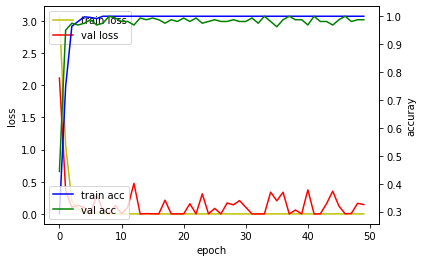

In [21]:
# 모델 학습 과정 표시

matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# acc, 정확도
# loss, 손실